
# 本周内容的概括：
 - 遗传算法

# 1. 仿生算法（Nature Inspired Computation）

> 是受自然启发的算法
>  - 从自然寻找灵感
>  - 在计算机中重现自然现象
>  - 用新型自然材料来将进行计算
>  - 只要沾上这三种的就叫自然计算

> 主要目标：
>  - 设计理论模型，来重现某自然现象的功能
>  - 研究自然现象来提升算法的性能

> 常见例子
>  - NN
>  - 进化算法/遗传算法
>  - 蜂群智能
>  - 人工免疫系统 

怎么都是废话，我要快进到计算题了


# 2. 进化算法/遗传算法



>> 算法流程
> 1. 随机初始化生物
> 2. 评估每个生物的适应性（用适应性函数计算）
> 3. 选择一部分生物做亲代
> 4. 重组亲代
> 5. 变异来产生子代
> 6. 选择一些子代进入下一轮
> 7. 若未满足结束条件，返回3. 

**核心思想：种群个体对有限资源的竞争** 

算法组件：

1. **代表/表示/Representation**
   - 将真实世界问题连接到进化算法的世界中
   - 通常要对问题进行某种抽象/简化，来得到解
   - 可能的解决方案叫做性状/genotype
   - 编解码：问题的解和性状之间的转化
2. **评估算法/Evaluation Function**
   - 表现出种群要去适应的各种条件
   - 建立选择的基础，然后优化
   - 可以看作是待解决的任务
   - 衡量性状的适应度
3. **人口/种群/Population**
   - 内含所有可能的解
   - 其大小一般是常数
   - 选择运算子一般运作在种群层面上
   - 种群的多样性是解的多样性的一种体现
   - 有很多衡量这个的性能指标（count，熵，等等）
4. **亲代选择/Parent Selection**
   - 根据适应性选择
   - 只要被选中要去进行recombination和mutation，就算亲代
   - 一般是用概率选出
   - 高质量的个体有高几率被选中
   - 这是为了防止种群过度贪婪而陷入局部最优
5. **重组/Recombination**
   - 将亲代的信息传给子代
   - 大自然里的这个过程就是随机的：随机选取部分传给孩子
   - 希望组合出更优秀的个体
   - 一般是概率性的
6. **变异/Mutation**
   - 对一个个体使用，可以得到一个新个体
   - 一般也是随机的
7. **替换/Replacement**
   - 就像亲代选择一样，用适应度区分个体
   - 在子代创建后使用
   - 由于人口恒定，所以要选择哪些个体能进入下一代
   - 一般是确定的（例如，选择最合适的若干个进入下一代）
8. **初始化/Initialization**
   - 进化算法里的这个一般没有搞得很复杂
   - 随机生成
   - 可以用问题提供的启发式信息来搞
9. **终点/Termination**
   - 最大CPU运行时
   - 评估过阈值次适应度了
   - 提升幅度小于阈值了
   - 物种多样性低过阈值了


## 2.1 二进制例子

- 性状就是一串0和1
- 必须确保所有的二进制串都能代表一种解法
- **变异/Mutation**：
  - 按位/bitwise
  - 标准/uniform
- **重组/Recombination**：
  - 单点/One Point
    - 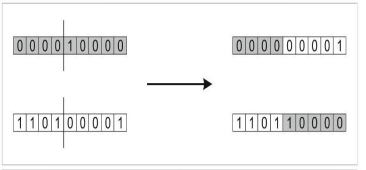
    - 中间这个点一般是随机生成
  - 两点/Two Point
    - 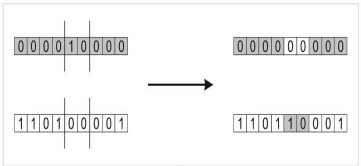
  - 标准/Uniform
    - 随机生成一个和个体一样长的数字串，再用一个阈值判断是否交换那个位置的数字
    - 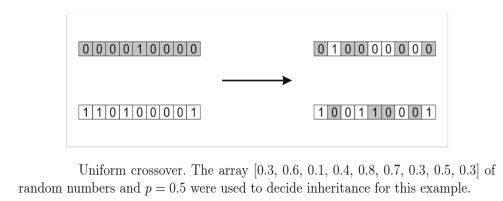

注：个体上数字的点的标注方式：  
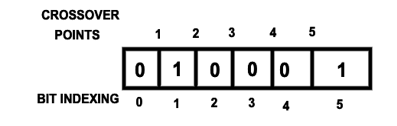

## 2.2 整数例子

 - **变异/Mutation**：
   - 随机重置/Random Resetting：bit flip的一种延伸，对于每个位置，有`p`的概率将它的值随机设成一个随机整数
   - 爬/Creep Mutation：对每个基因有`p`的随机概率加上一个小不点值。每个位置加的值是随机采样的
 - **重组/Recombination**:
   - 和二进制的手法一样

## 2.3 实数例子：

 - **重组/Recombination**：
   - 简单算法/Simple Arithmetic:
     - 给定一个k，一个$\alpha$
     - 子代的第1~k个值是爹1号的
     - 子代的后面的值是 $(1-\alpha)爹一号+\alpha爹二号$

In [28]:
import numpy as np

father1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
father2 = np.array([0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3])

k = 6
alpha = 0.5

'''
description: 
param {*} f1 爹一号
param {*} f2 爹二号
param {*} k
param {*} alpha
return {*} 打印两个结果
'''
def Simple(f1, f2, k, alpha):
    r1 = f1.copy()
    r2 = f2.copy()

    for _ in range(k, len(f1)):
        r1[_] = alpha*f2[_]+(1-alpha)*f1[_]
        r2[_] = alpha*f1[_]+(1-alpha)*f2[_]

    print("儿子一号"+str(r1))
    print("儿子二号"+str(r2))

Simple(father1, father2, k, alpha)


儿子一号[0.1 0.2 0.3 0.4 0.5 0.6 0.5 0.5 0.6]
儿子二号[0.3 0.2 0.3 0.2 0.3 0.2 0.5 0.5 0.6]


- 单点算法：
  - 就选中的点那么算一下

In [33]:
import numpy as np

father1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
father2 = np.array([0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3])

k = 8
alpha = 0.5


def Single(f1, f2, k, alpha):
    r1 = f1.copy()
    r2 = f2.copy()

    k = k-1

    r1[k] = alpha*f2[k]+(1-alpha)*f1[k]
    r2[k] = alpha*f1[k]+(1-alpha)*f2[k]

    print("儿子一号"+str(r1))
    print("儿子二号"+str(r2))

Single(father1, father2, k, alpha)

儿子一号[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.5 0.9]
儿子二号[0.3 0.2 0.3 0.2 0.3 0.2 0.3 0.5 0.3]


 - 完全算法：
   - 全缝了
   - 会产生两个一样的子代

In [34]:
import numpy as np

father1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
father2 = np.array([0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 0.3])

alpha = 0.5


def Whole(f1, f2, alpha):
    r1 = f1.copy()
    r2 = f2.copy()

    r1 = alpha*f1+(1-alpha)*f2
    r2 = alpha*f2+(1-alpha)*f1

    print("儿子一号"+str(r1))
    print("儿子二号"+str(r2))

Whole(father1, father2, alpha)

儿子一号[0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6]
儿子二号[0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6]


  - 局部映射交叉/Partially Mapped Crossover:
      1. 随机选两个点，把第一个爹两点之间这一部分复制给第一个子代
      2. 看第二个爹的这一段，有哪些是没被上一步复制过去的
      3. 对于上一步中的每一个没被复制的元素，看看这个元素在段里是什么位置，那个位置现在是谁。
      4. 把没被复制的元素放到上一步中找到的那个占了位置的元素在爹2的位置上
      5. 如果上一步中的位置有人占了，那就再放在占这个位置的人在爹2的位置上。
      6. 剩下的位置用爹2直接粘贴

In [80]:
import numpy as np

P1 = np.array([1,2,3,4,5,6,7,8,9])
P2 = np.array([9,3,7,8,2,6,5,1,4])
# k1,k2 使用标准的那个标数法，见上述
k1 = 3
k2 =7


def place(element,placeholder,P2,result):
    INIT = -9999
    target_place = np.where(P2==placeholder)

    if(result[target_place]!=INIT): # 还是有人占了这个位置
        place(element,result[target_place],P2,result)
    else:
      result[target_place] = element

def PMC(P1,P2,k1,k2):
    INIT = -9999
    result = np.zeros(len(P1))
    result = result+INIT

    # 选出被截的段，赋给子代

    segment1 = P1[k1:k2]
    segment1 = segment1.copy()

    temp = segment1.copy()
    result[k1:k2] = temp
    
    segment2 = P2[k1:k2]
    segment2 = segment2.copy()


    # 爹2段里哪些在爹1段里找不到：
    diff = np.setdiff1d(segment2,segment1)


    for _ in diff:
        # 对每个没被复制的爹2元素，查看它在段里的位置
        index = np.where(P2==_)
        # 记录这个位置上现在是谁？
        placeholder = result[index]
        # 把没被复制的爹2元素放在上一步中这个占位者在爹2的位置上
        # 如果还是有人占了这个位置，就将占位者改为这个新的，再回到上一步
        place(_,placeholder,P2,result)
    

    for i in range(len(result)):
        if result[i]==INIT:
            result[i] = P2[i]        
        
    print(result)



PMC(P1,P2,3,7)


[9. 3. 2. 4. 5. 6. 7. 1. 8.]


- **变异**：变异都是运行在单个个体上的
  - 交换/swap：选两个位置，交换它们。
  - 插入/insert：选两个位置，把后面的拖到前面的后面
    - 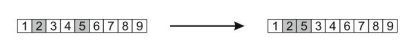
  - 打乱/Scramble：选择一个区域，打乱顺序
    - 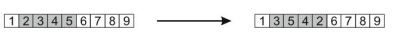
  - 反转/inversion：选择一个区域，反转其中的一切
    - 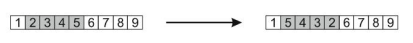



## 2.4 选择算法

适应度比例算法/Fitness Propotional Selection

 - 计算各个生物的适应度
 - 将所有适应度的和归一化到1
 - 随机抽一个0~1之间的数字，落到谁就是谁
 - 轮盘上的顺序题目会说